In [1]:
%matplotlib inline
# problem worked on: AI Hack Tunisia #6 - Predictive analytics challenge #3
# url of the problem: https://zindi.africa/competitions/ai-hack-tunisia-6-predictive-analytics-challenge-3/leaderboard

In [2]:
# imports:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("data/train.csv")
t_df = pd.read_csv("data/test.csv")

In [4]:
df.shape

(25053, 121)

In [5]:
# remove id:
df = df.drop("id", axis=1)
t_df = t_df.drop("id", axis=1)

,Total,Percent
SND_MNTTVA_E,23610,0.942402
SND_MNTPRD_E,23610,0.942402
SND_MNTDRC_E,23610,0.942402
SND_MNTAVA_E,23610,0.942402
SND_MNTTAX_E,23610,0.942402


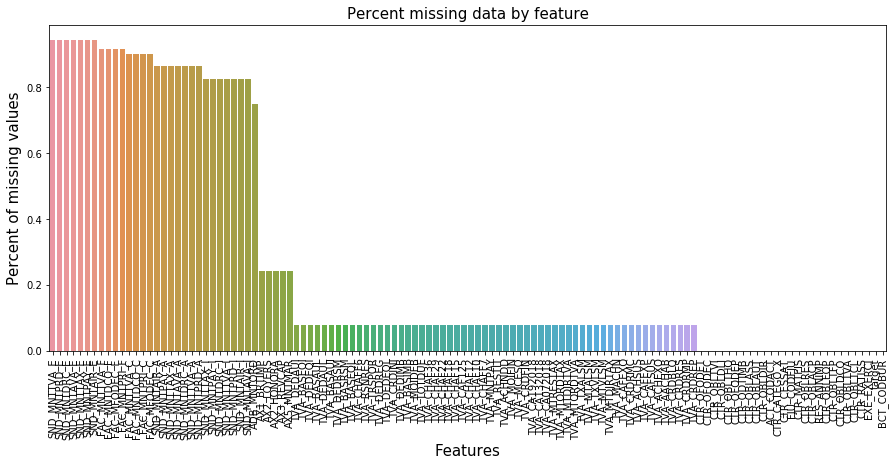

In [6]:
# Handle Missing Data:
# delete rows with nan values? : all rows will be deteled!!
# strategy?
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

,Total,Percent
SND_MNTTVA_E,23610,0.942402
SND_MNTPRD_E,23610,0.942402
SND_MNTDRC_E,23610,0.942402
SND_MNTAVA_E,23610,0.942402
SND_MNTTAX_E,23610,0.942402


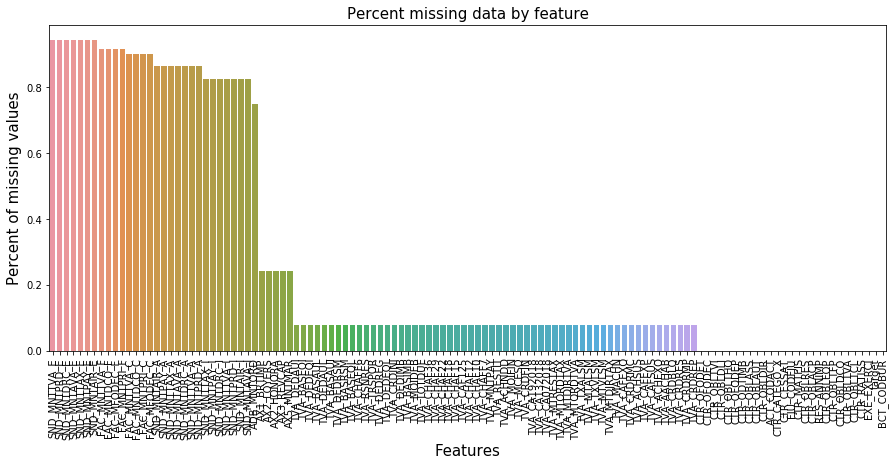

In [7]:
# same work for test_set:
# Handle Missing Data:
# delete rows with nan values? : all rows will be deteled!!
# strategy?
t_total = t_df.isnull().sum().sort_values(ascending=False)
t_percent = (t_df.isnull().sum()/t_df.isnull().count()).sort_values(ascending=False)
t_missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=t_missing_data.index, y=t_missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [8]:
#for feature in missing_data.index:
t_missing_data["Percent"]
t_sure_high_percent = missing_data[missing_data["Percent"]>0.7]

In [9]:
missing_data["Percent"]
sure_high_percent = missing_data[missing_data["Percent"]>0.7]

In [10]:
sure_high_percent.index

Index(['SND_MNTTVA_E', 'SND_MNTPRD_E', 'SND_MNTDRC_E', 'SND_MNTAVA_E',
       'SND_MNTTAX_E', 'SND_MNTPAY_E', 'SND_MNTAIR_E', 'FAC_MNTTVA_F',
       'FAC_MNTDCO_F', 'FAC_MFODEC_F', 'FAC_MNTPRI_F', 'FAC_MNTTVA_C',
       'FAC_MNTDCO_C', 'FAC_MNTPRI_C', 'FAC_MFODEC_C', 'SND_MNTAIR_A',
       'SND_MNTPAY_A', 'SND_MNTTAX_A', 'SND_MNTAVA_A', 'SND_MNTDRC_A',
       'SND_MNTTVA_A', 'SND_MNTPRD_A', 'SND_MNTTAX_I', 'SND_MNTPAY_I',
       'SND_MNTDRC_I', 'SND_MNTTVA_I', 'SND_MNTPRD_I', 'SND_MNTAIR_I',
       'SND_MNTAVA_I', 'ADB_MNTORD'],
      dtype='object')

In [11]:
t_sure_high_percent.index

Index(['SND_MNTTVA_E', 'SND_MNTPRD_E', 'SND_MNTDRC_E', 'SND_MNTAVA_E',
       'SND_MNTTAX_E', 'SND_MNTPAY_E', 'SND_MNTAIR_E', 'FAC_MNTTVA_F',
       'FAC_MNTDCO_F', 'FAC_MFODEC_F', 'FAC_MNTPRI_F', 'FAC_MNTTVA_C',
       'FAC_MNTDCO_C', 'FAC_MNTPRI_C', 'FAC_MFODEC_C', 'SND_MNTAIR_A',
       'SND_MNTPAY_A', 'SND_MNTTAX_A', 'SND_MNTAVA_A', 'SND_MNTDRC_A',
       'SND_MNTTVA_A', 'SND_MNTPRD_A', 'SND_MNTTAX_I', 'SND_MNTPAY_I',
       'SND_MNTDRC_I', 'SND_MNTTVA_I', 'SND_MNTPRD_I', 'SND_MNTAIR_I',
       'SND_MNTAVA_I', 'ADB_MNTORD'],
      dtype='object')

In [12]:
deleted_columns = list()
for feature in df.columns:
    if feature in sure_high_percent.index:
        df = df.drop(feature, axis=1)
        deleted_columns.append(feature)

In [13]:
deleted_columns

['ADB_MNTORD',
 'SND_MNTPRD_I',
 'SND_MNTTVA_I',
 'SND_MNTDRC_I',
 'SND_MNTAVA_I',
 'SND_MNTTAX_I',
 'SND_MNTPAY_I',
 'SND_MNTAIR_I',
 'SND_MNTPRD_E',
 'SND_MNTTVA_E',
 'SND_MNTDRC_E',
 'SND_MNTAVA_E',
 'SND_MNTTAX_E',
 'SND_MNTPAY_E',
 'SND_MNTAIR_E',
 'SND_MNTPRD_A',
 'SND_MNTTVA_A',
 'SND_MNTDRC_A',
 'SND_MNTAVA_A',
 'SND_MNTTAX_A',
 'SND_MNTPAY_A',
 'SND_MNTAIR_A',
 'FAC_MNTPRI_F',
 'FAC_MFODEC_F',
 'FAC_MNTDCO_F',
 'FAC_MNTTVA_F',
 'FAC_MNTPRI_C',
 'FAC_MFODEC_C',
 'FAC_MNTDCO_C',
 'FAC_MNTTVA_C']

In [15]:
t_df = t_df.drop(deleted_columns, axis=1)

In [17]:
t_df.shape

(10738, 89)

In [66]:
df.shape

(25053, 90)

In [67]:
t_df.shape

(10738, 89)

In [18]:
# fill nan values with 0:
df = df.fillna(0)
t_df = t_df.fillna(0)

In [19]:
# how many zeros in a target
zero_count = df.apply(lambda column: (column == 0).sum())
zero_count_t = t_df.apply(lambda column: (column == 0).sum())

In [22]:
zero_features_list = []
for feature in zero_count.index:
    if zero_count[feature]>17537:
        zero_features_list.append(feature)
# delete columns with more than 70% zeros:
df = df.drop(zero_features_list, axis=1)

KeyError: "['CTR_CESSAT' 'CTR_RATISS' 'TVA_CHAFF6' 'TVA_CHAFF7' 'TVA_CHAF10'\n 'TVA_CHAF12' 'TVA_CAF125' 'TVA_CHAF15' 'TVA_CHAF22' 'TVA_CHAF29'\n 'TVA_CHAF36' 'TVA_BASIMB' 'TVA_DEDIMB' 'TVA_BASEQL' 'TVA_DEDEQL'\n 'TVA_BASEQI' 'TVA_DEDEQI' 'TVA_BASAUI' 'TVA_DEDAUI' 'TVA_BASRSM'\n 'TVA_DEDRSM' 'TVA_RSNRES' 'TVA_TRSPOR' 'TVA_DEDREG' 'TVA_RESTIT'\n 'TVA_ACHSUS' 'TVA_ACHEXO' 'TVA_ACHNDD' 'TVA_CAFEXP' 'TVA_CAFSUS'\n 'TVA_CAFEXO' 'TVA_AACHAB' 'TVA_CRDBLQ' 'TVA_CRDRES' 'TVA_CRDRMP'\n 'TVA_CRDREP' 'TVA_CRDRMC' 'TVA_MACHN' 'TVA_MCESQ' 'TVA_MTVLSM'\n 'TVA_TXVLSM' 'TVA_MTALSM' 'TVA_TXALSM' 'TVA_MTORDTVA' 'TVA_MTDJRTVA'\n 'TVA_MTORDTAX' 'TVA_MTDJRTAX' 'TVA_MTRESTAX' 'TVA_CA072018'\n 'TVA_CA132018' 'TVA_CA192018' 'AX1_BRTIMP' 'AX2_HONORA' 'AX2_LOYERS'\n 'AX3_REVCAP'] not found in axis"

In [23]:
t_df = t_df.drop(zero_features_list, axis=1)

KeyError: "['CTR_CESSAT' 'CTR_RATISS' 'TVA_CHAFF6' 'TVA_CHAFF7' 'TVA_CHAF10'\n 'TVA_CHAF12' 'TVA_CAF125' 'TVA_CHAF15' 'TVA_CHAF22' 'TVA_CHAF29'\n 'TVA_CHAF36' 'TVA_BASIMB' 'TVA_DEDIMB' 'TVA_BASEQL' 'TVA_DEDEQL'\n 'TVA_BASEQI' 'TVA_DEDEQI' 'TVA_BASAUI' 'TVA_DEDAUI' 'TVA_BASRSM'\n 'TVA_DEDRSM' 'TVA_RSNRES' 'TVA_TRSPOR' 'TVA_DEDREG' 'TVA_RESTIT'\n 'TVA_ACHSUS' 'TVA_ACHEXO' 'TVA_ACHNDD' 'TVA_CAFEXP' 'TVA_CAFSUS'\n 'TVA_CAFEXO' 'TVA_AACHAB' 'TVA_CRDBLQ' 'TVA_CRDRES' 'TVA_CRDRMP'\n 'TVA_CRDREP' 'TVA_CRDRMC' 'TVA_MACHN' 'TVA_MCESQ' 'TVA_MTVLSM'\n 'TVA_TXVLSM' 'TVA_MTALSM' 'TVA_TXALSM' 'TVA_MTORDTVA' 'TVA_MTDJRTVA'\n 'TVA_MTORDTAX' 'TVA_MTDJRTAX' 'TVA_MTRESTAX' 'TVA_CA072018'\n 'TVA_CA132018' 'TVA_CA192018' 'AX1_BRTIMP' 'AX2_HONORA' 'AX2_LOYERS'\n 'AX3_REVCAP'] not found in axis"

In [24]:
df.shape

(25053, 35)

In [27]:
t_df.shape

(10738, 34)

In [29]:
df = pd.get_dummies(df)
t_df = pd.get_dummies(t_df)

In [38]:
df = df.drop("CTR_CATEGO_X_N", axis=1)
df.shape

(25053, 37)

In [39]:
t_df.shape

(10738, 36)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25053 entries, 0 to 25052
Data columns (total 38 columns):
BCT_CODBUR        25053 non-null int64
CTR_MATFIS        25053 non-null int64
FJU_CODFJU        25053 non-null int64
ACT_CODACT        25053 non-null int64
CTR_OBLDIR        25053 non-null int64
CTR_OBLACP        25053 non-null int64
CTR_OBLRES        25053 non-null int64
CTR_OBLFOP        25053 non-null int64
CTR_OBLTFP        25053 non-null int64
CTR_OBLDCO        25053 non-null int64
CTR_OBLTVA        25053 non-null int64
CTR_OFODEC        25053 non-null float64
CTR_OFODEP        25053 non-null float64
CTR_OFODET        25053 non-null float64
CTR_OBLAUT        25053 non-null float64
CTR_OBLASS        25053 non-null float64
CTR_ODTIMB        25053 non-null float64
CTR_OBLTCL        25053 non-null int64
CTR_OBLTHO        25053 non-null float64
CTR_OBLDLI        25053 non-null float64
CTR_OBLTVI        25053 non-null float64
EXE_EXERCI        25053 non-null int64
TVA_CHAF18     

    # visualisations/plots:

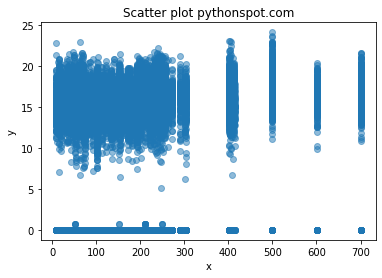

In [17]:
# scatter_plot of target by BCT_CODBUR 
def plot_df(df, x, y, title="", xlabel='BCT_CODBUR', ylabel='target', dpi=100):
    # Plot
    plt.scatter(x, y, alpha=0.5)
    plt.title('Scatter plot pythonspot.com')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
plot_df(df, x=df["BCT_CODBUR"], y=df["target"], title='target per BCT_CODBUR')

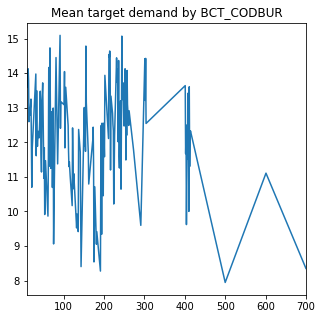

In [18]:
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
df.groupby('BCT_CODBUR').target.agg('mean').plot()
plt.xlabel('')
plt.title('Mean target demand by BCT_CODBUR');

Text(0.5, 1.0, 'Mean target by EXE_EXERCI')

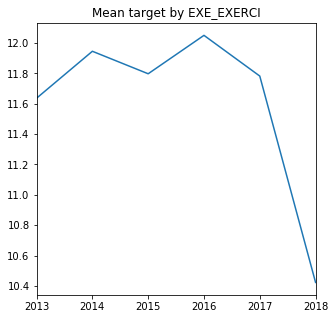

In [19]:
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
df.groupby('EXE_EXERCI').target.agg('mean').plot()
plt.xlabel('')
plt.title('Mean target by EXE_EXERCI')

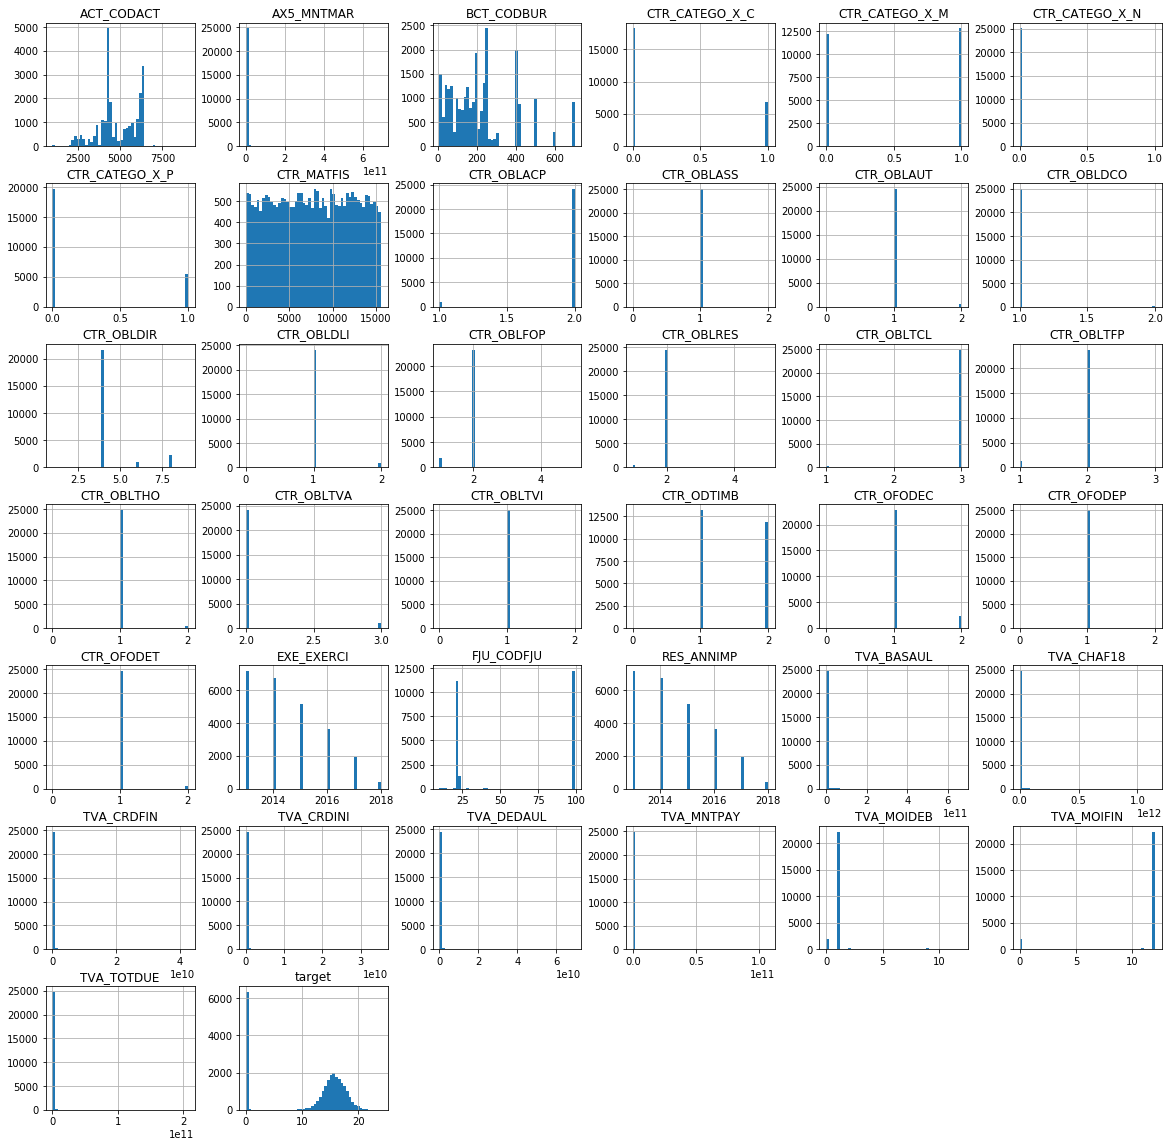

In [20]:
# histogram of all features:
df.hist(bins=50, figsize=(20, 20))
plt.show()

Text(0.5, 1.05, 'Correlation Matrix')

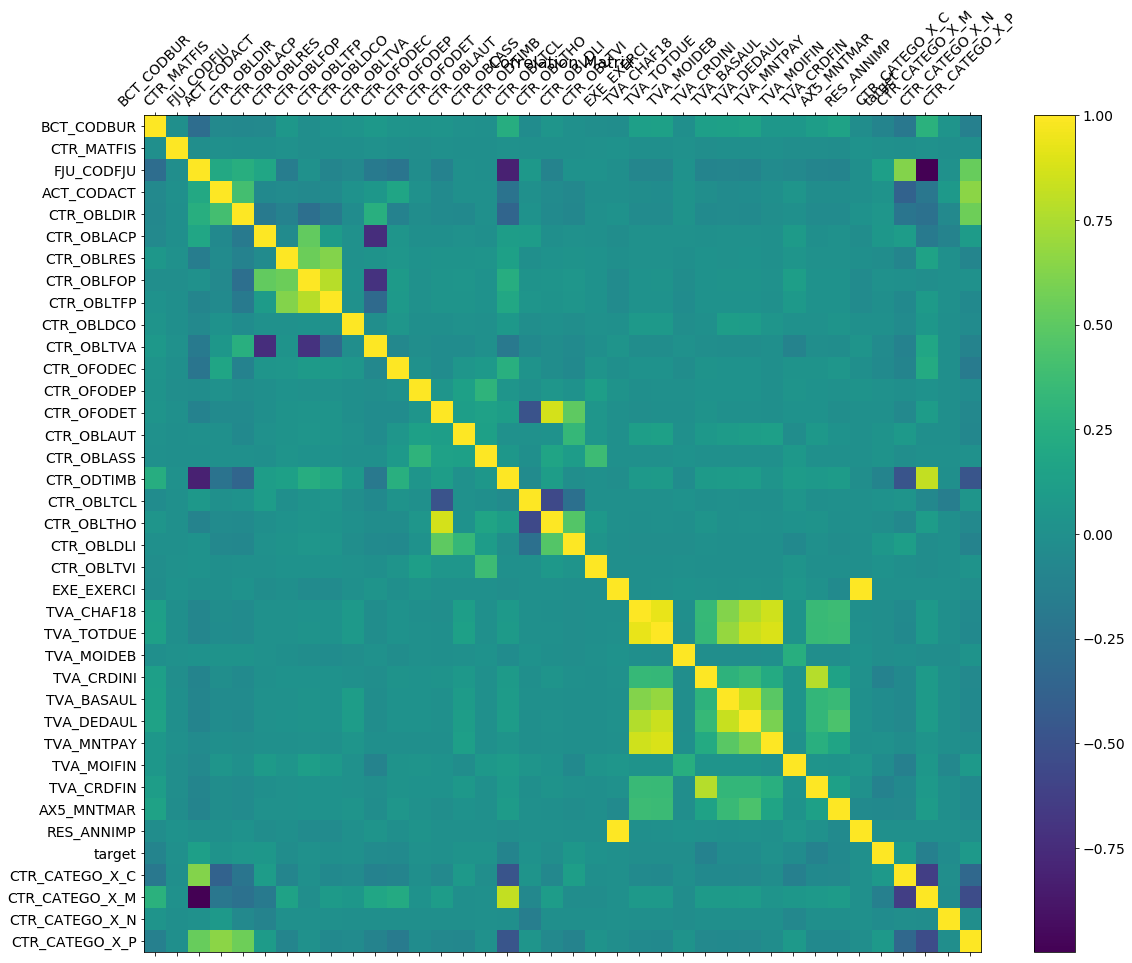

In [21]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

Text(0.5, 1.0, 'Mean CTR_CATEGO_X_M by FJU_CODFJU')

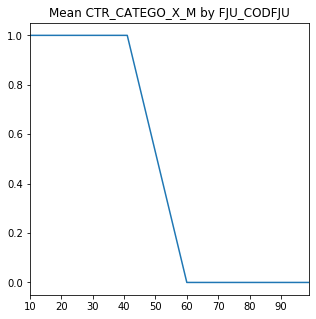

In [22]:
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
df.groupby('FJU_CODFJU').CTR_CATEGO_X_M.agg('mean').plot()
plt.xlabel('')
plt.title('Mean CTR_CATEGO_X_M by FJU_CODFJU')

Text(0.5, 1.0, 'Mean CTR_CATEGO_X_M by FJU_CODFJU')

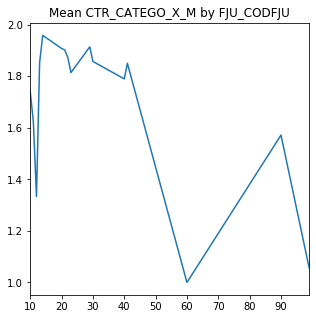

In [23]:
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
df.groupby('FJU_CODFJU').CTR_ODTIMB.agg('mean').plot()
plt.xlabel('')
plt.title('Mean CTR_CATEGO_X_M by FJU_CODFJU')

Text(0.5, 1.0, 'Mean CTR_OBLTVA by CTR_OBLFOP')

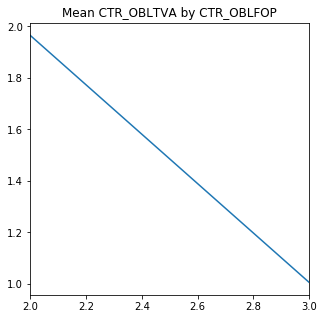

In [24]:
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
df.groupby('CTR_OBLTVA').CTR_OBLFOP.agg('mean').plot()
plt.xlabel('')
plt.title('Mean CTR_OBLTVA by CTR_OBLFOP')

In [40]:
df = df.drop("CTR_OBLFOP", axis=1)
t_df = t_df.drop("CTR_OBLFOP", axis=1)

In [41]:
df.shape

(25053, 36)

In [42]:
# modeling? best split value for xgboost algorithm?
X = df.drop("target", axis=1)
Y = df["target"]

In [43]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
split_sizes = [0.20, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.30, 0.31, 0.32, 0.33, 0.34, 0.35]
acc_train = list()
acc_test = list()
for size in split_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=size, random_state=10)
    xgb = XGBRegressor(colsample_bytree=0.7,learning_rate=0.03,max_depth=7,min_child_weight=4,
                    n_estimators=500,
                    nthread=4,
                    objective='reg:linear',
                    silent=1,
                    subsample=0.7)
    xgb.fit(X_train,y_train)
    #clf.fit(train_x, train_y, early_stopping_rounds=20, eval_set=[(test_x, test_y)])
    y_pred_train = xgb.predict(X_train)
    y_pred_test = xgb.predict(X_test)
    acc_train.append(sqrt(mean_squared_error(y_train, y_pred_train)))
    acc_test.append(sqrt(mean_squared_error(y_test, y_pred_test)))

/home/solixy-tessnim/anaconda3/envs/tessnim/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/solixy-tessnim/anaconda3/envs/tessnim/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/solixy-tessnim/anaconda3/envs/tessnim/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/solixy-tessnim/anaconda3/envs/tessnim/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/solixy-tessnim/anaconda3/envs/tessnim/lib/python3.7/site-packages/xgboost/core.py:587: FutureW

In [35]:
# grid search cv
from sklearn.model_selection import GridSearchCV
parameters = {'min_child_weight':[4,5,8,11], 'objective':["reg:linear"], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}
xgb_model = XGBRegressor()
clf = GridSearchCV(xgb_model, parameters, n_jobs=5)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=size, random_state=10)

In [36]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [37]:
clf.fit(X_train, y_train)

/home/solixy-tessnim/anaconda3/envs/tessnim/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:46:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1566327313563/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_sta...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=5,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
                         'gamma': [0.3, 0.4, 0.5], 'max_depth': [2, 3, 4],
                         'min_child_we

In [46]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print(sqrt(mean_squared_error(y_test, clf.best_estimator_.predict(X_test))))

6.190366347131534


In [47]:
clf.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0.3,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=5, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)

In [44]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
split_sizes = [0.20, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.30, 0.31, 0.32, 0.33, 0.34, 0.35]
acc_train = list()
acc_test = list()
for size in split_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=10)
    xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0.3,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=5, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)
    xgb.fit(X_train,y_train)
    #clf.fit(train_x, train_y, early_stopping_rounds=20, eval_set=[(test_x, test_y)])
    y_pred_train = xgb.predict(X_train)
    y_pred_test = xgb.predict(X_test)
    y_sub = xgb.predict(t_df)
    acc_train.append(sqrt(mean_squared_error(y_train, y_pred_train)))
    acc_test.append(sqrt(mean_squared_error(y_test, y_pred_test)))

/home/solixy-tessnim/anaconda3/envs/tessnim/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1566327313563/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/solixy-tessnim/anaconda3/envs/tessnim/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1566327313563/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/solixy-tessnim/anaconda3/envs/tessnim/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1566327313563/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/solixy-tessnim/anaconda3/envs/tessnim/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1566327313563/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/solixy-tessnim/anaconda3/envs/tessnim/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1566327313563/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/solixy-tessnim/anaconda3/envs/tessnim/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1566327313563/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/solixy-tessnim/anaconda3/envs/tessnim/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1566327313563/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/solixy-tessnim/anaconda3/envs/tessnim/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1566327313563/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/solixy-tessnim/anaconda3/envs/tessnim/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1566327313563/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/solixy-tessnim/anaconda3/envs/tessnim/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1566327313563/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/solixy-tessnim/anaconda3/envs/tessnim/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1566327313563/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/solixy-tessnim/anaconda3/envs/tessnim/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1566327313563/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/solixy-tessnim/anaconda3/envs/tessnim/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1566327313563/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/solixy-tessnim/anaconda3/envs/tessnim/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1566327313563/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/solixy-tessnim/anaconda3/envs/tessnim/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1566327313563/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/solixy-tessnim/anaconda3/envs/tessnim/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1566327313563/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [53]:
subdf = pd.read_csv("data/test.csv")
new_df = pd.DataFrame({"id": subdf.id, "target": y_sub})
new_df.to_csv("data/submission1.csv", index=False)

Text(0.5, 1.0, 'Accuracy by split size')

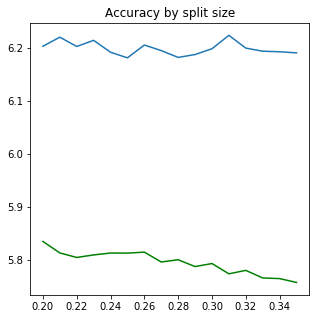

In [49]:
# split_sizes
# acc_train
# acc_test
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
plt.plot(split_sizes, acc_train, color='green')
plt.plot(split_sizes, acc_test)
plt.title('Accuracy by split size')

In [53]:
split_sizes, acc_train, acc_test

([0.2,
  0.21,
  0.22,
  0.23,
  0.24,
  0.25,
  0.26,
  0.27,
  0.28,
  0.29,
  0.3,
  0.31,
  0.32,
  0.33,
  0.34,
  0.35],
 [5.834958094865215,
  5.813266186873804,
  5.80471699080701,
  5.809469382926884,
  5.813035978483018,
  5.812859419933331,
  5.814780293195286,
  5.796173367854875,
  5.800415079654547,
  5.7875370133936705,
  5.79323802947757,
  5.773863643054405,
  5.780364609500434,
  5.766026590046738,
  5.764853881991908,
  5.757602369168426],
 [6.202866166324241,
  6.21994284379537,
  6.202434333001585,
  6.2140132905535035,
  6.191594974993382,
  6.181007861425956,
  6.205148631411272,
  6.194694145413122,
  6.181835577055541,
  6.187225338699017,
  6.198171128740745,
  6.22341219274659,
  6.199354136614075,
  6.193543798348139,
  6.192491381109888,
  6.190366347131534])

In [54]:
min(acc_test)

6.181007861425956